In [1]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Reading the dataset
datasetSD2 = pd.read_csv('./Solar_Power/Plant_2_Weather_Sensor_Data.csv')


# See the shape of the dataset
print(datasetSD2.shape)


# Some statitistics of the dataset
datasetSD2.describe()


(3259, 6)


,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [3]:
datasetSD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [4]:
datasetSD2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [5]:
# adding another column for only date (without time)
datasetSD2['date'] = pd.to_datetime(datasetSD2['DATE_TIME']).dt.normalize()

In [6]:
datasetSD2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,2020-05-15
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0,2020-05-15
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0,2020-05-15
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0,2020-05-15


# What is the total irradiation per day

In [7]:
# What is the total irradiation per day
# group the rows based on "date" and take the sum from IRRADIATION column
sumIRR = datasetSD2.groupby(["date"]).IRRADIATION.sum().reset_index()

In [8]:
sumIRR.head(89)

,date,IRRADIATION
0,2020-05-15,28.559055
1,2020-05-16,23.676573
2,2020-05-17,21.233595
3,2020-05-18,21.495780
4,2020-05-19,20.345321
5,2020-05-20,26.786871
6,2020-05-21,27.191185
7,2020-05-22,28.535843
8,2020-05-23,28.159981
9,2020-05-24,27.426044


In [9]:
# It should give exactly the number of days = 34
print(sumIRR.shape)

(34, 2)


Text(0, 0.5, 'IRRADIATION per day')

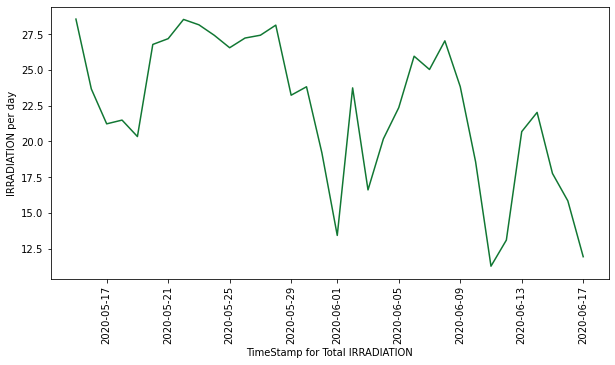

In [10]:
# plot nTimeStamp for Total IRRADIATION
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.plot(sumIRR['date'], sumIRR['IRRADIATION'], color= '#117733')
plt.xlabel('TimeStamp for Total IRRADIATION')
plt.ylabel('IRRADIATION per day')


Text(0, 0.5, 'Total IRRADIATION per day')

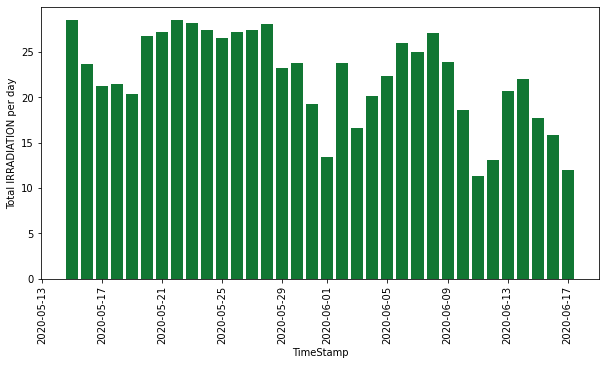

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(sumIRR['date'], sumIRR['IRRADIATION'], color= '#117733')

# Adding labels
plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('Total IRRADIATION per day')



# What is the max of Ambient

In [12]:
# What is the max of Ambient
# group the rows based on "date" and take the sum from AMBIENT_TEMPERATURE column
maxambient = datasetSD2.groupby(["date"]).AMBIENT_TEMPERATURE.max().reset_index()

In [13]:
maxambient.head()

,date,AMBIENT_TEMPERATURE
0,2020-05-15,37.352829
1,2020-05-16,36.358956
2,2020-05-17,36.831242
3,2020-05-18,34.207890
4,2020-05-19,34.510850


In [14]:
# It should give exactly the number of days = 34
print(maxambient.shape)

(34, 2)


In [15]:
totalMaxambient = maxambient.AMBIENT_TEMPERATURE.max()
totalMaxambient

39.18163776666667

# What is the max of MODULE

In [16]:
# What is the max of MODULE
# group the rows based on "date" and take the sum from MODULE_TEMPERATURE column
maxMODULE = datasetSD2.groupby(["date"]).MODULE_TEMPERATURE.max().reset_index()

In [17]:
maxMODULE.head()

,date,MODULE_TEMPERATURE
0,2020-05-15,60.389377
1,2020-05-16,66.016279
2,2020-05-17,59.100530
3,2020-05-18,50.825745
4,2020-05-19,53.399307


In [18]:
# It should give exactly the number of days = 34
print(maxMODULE.shape)

(34, 2)


In [19]:
totalmaxMODULE = maxMODULE.MODULE_TEMPERATURE.max()
totalmaxMODULE

66.6359527586207

# How many inverters (SOURCE_KEY) are There for each plant

In [20]:
# how many inverters (SOURCE_KEY) are There for each plant
from collections import Counter
inverters_key = Counter(datasetSD2['SOURCE_KEY']).keys()

# number of inverters
print('\n Number of inverters: ',len(inverters_key))

print('\n Key of inverters: \n\n', inverters_key) # finding unique elements in SOURCE_KEY which shows the inverters


# total number of measurements from each inverter over the whole 34 days
Counter(datasetSD2['SOURCE_KEY']).values() # finding frequency of elements in SOURCE_KEY


 Number of inverters:  1

 Key of inverters: 

 dict_keys(['iq8k7ZNt4Mwm3w0'])


dict_values([3259])

# Graphs that Explain The Patterns For ttributes Independent of Other Variables

Text(0, 0.5, 'AMBIENT_TEMPERATURE')

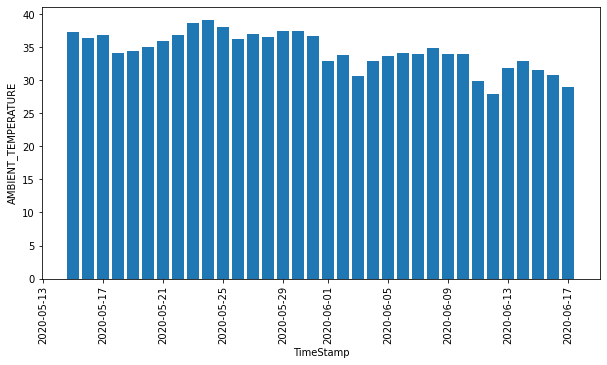

In [21]:
# plot nTimeStamp for AMBIENT_TEMPERATURE
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetSD2['date'], datasetSD2['AMBIENT_TEMPERATURE'])

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('AMBIENT_TEMPERATURE')



Text(0, 0.5, 'MODULE_TEMPERATURE')

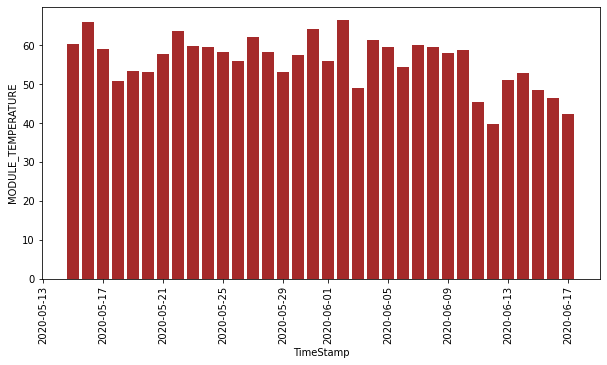

In [22]:
# plot nTimeStamp for MODULE_TEMPERATURE
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(datasetSD2['date'], datasetSD2['MODULE_TEMPERATURE'], color = 'brown')

# Add labels for X and Y
plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('MODULE_TEMPERATURE')


Text(0, 0.5, 'IRRADIATION')

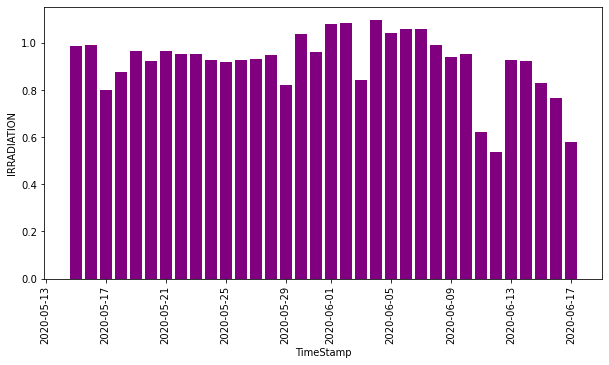

In [23]:
# plot nTimeStamp for IRRADIATION
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(datasetSD2['date'], datasetSD2['IRRADIATION'], color = 'purple')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('IRRADIATION')

